In [1]:
!python -m pip install pyyaml==5.1 #pyYAMl for configuratio and detectron 2 requires <= 5.1 version
import sys #access to python runtime environment
import os #file and  directory operations
import distutils.core  #used to build and install python modules from setup.py


!git clone 'https://github.com/facebookresearch/detectron2' #clones into current directory


dist = distutils.core.run_setup("./detectron2/setup.py") #programmtically runs the setup.py script inside the cloned folder

!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
#install all the dependencies under install requires from the setip.py

sys.path.insert(0, os.path.abspath('./detectron2'))
#adds the absolute path of ./detectron2 to the beginning of sys path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15912, done.
remote: Total 15912 (delta 0), reused 0 (delta 0), pack-reused 15912 (from 1)
Receiving objects: 100% (15912/15912), 6.68 MiB | 1.95 MiB/s, done.
Resolving deltas: 100% (11329/11329), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Prepari

In [2]:
import torch
import detectron2
torch.__version__

'2.8.0+cu126'

In [3]:
detectron2.__version__

'0.6'

In [4]:
import detectron2 #import detectron 2 package
from detectron2.utils.logger import setup_logger # logging system of detectron2
setup_logger() #initialisation of logger


#some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow


#detectron 2 utilities
from detectron2 import model_zoo #pretrained model
from detectron2.engine import DefaultPredictor #wrapper around detectron 2 inference pipeline
from detectron2.config import get_cfg #path to weight, model configuration, architecture
from detectron2.utils.visualizer import Visualizer #to visualise, boxes
from detectron2.data import MetadataCatalog, DatasetCatalog

#metadatacatalog>> stores metadata for dataset (classname, keypoints)
#datasetcatalog >> register andretrieve the dataset for detectron 2

In [5]:
import requests
import os

def download_image(url, filename):
  headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
  response = requests.get(url, stream=True, headers = headers)
  response.raise_for_status()

  with open(filename, "wb") as out_file:
    for chunk in response.iter_content(chunk_size=8192):
      out_file.write(chunk)


  print(f"Image downloaded successfully to {filename}")

download_image("https://images.pexels.com/photos/13872248/pexels-photo-13872248.jpeg", "pexels-photo-13872248.jpg")

Image downloaded successfully to pexels-photo-13872248.jpg


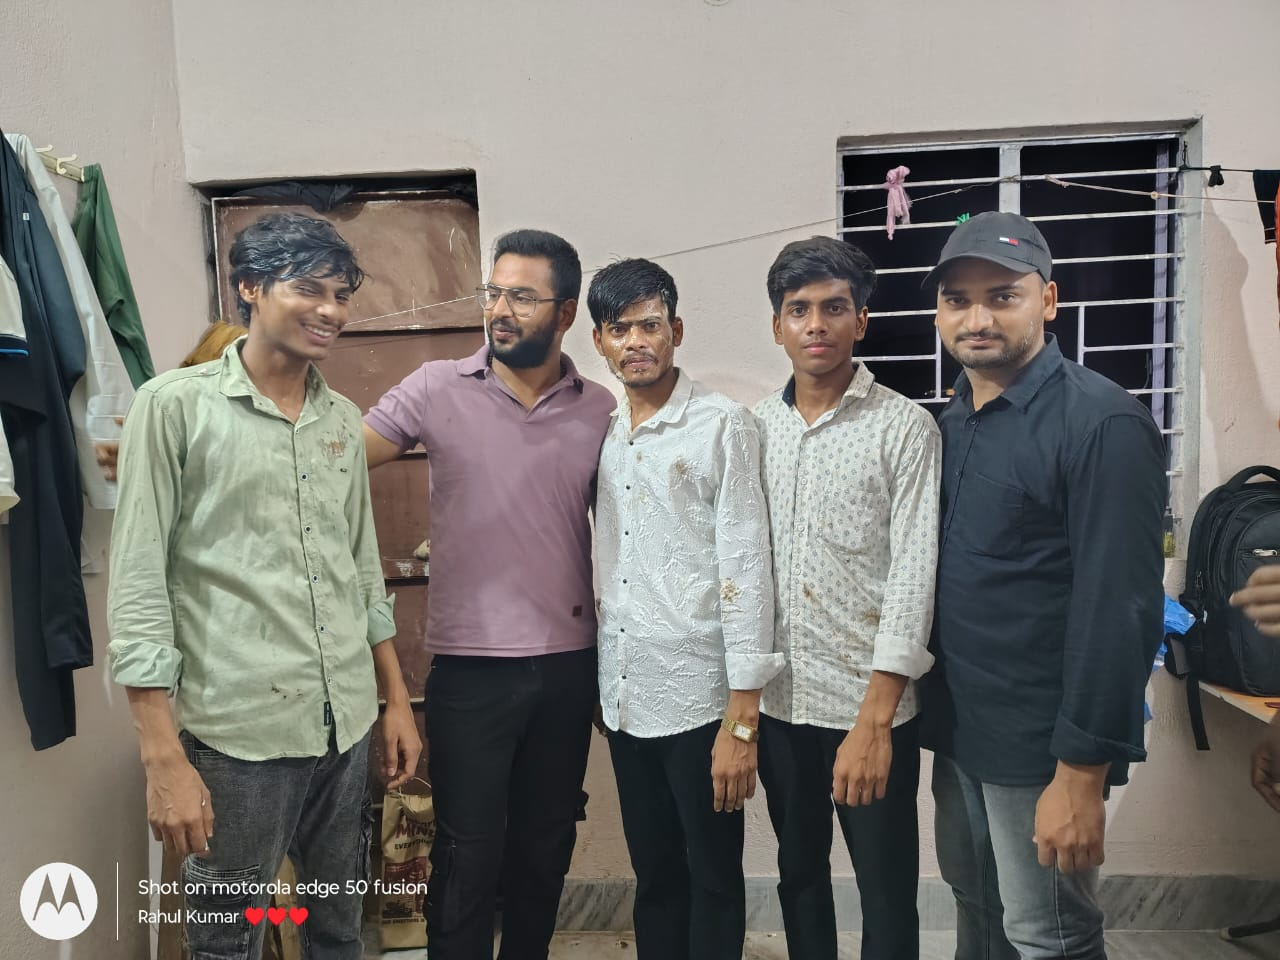

In [17]:
import cv2
from google.colab.patches import cv2_imshow

im = cv2.imread("/content/WhatsApp Image 2025-10-01 at 21.26.59_2a8ea1ec.jpg")
cv2_imshow(im)

In [18]:
cfg = get_cfg() #it initializes a fresh detectron2 configuration object, it holds all model weights and config

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
#during inference the model will only keep predicted boxes with a confidence score>=0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")
#retrieves the pretrained weights for the specificed moder
cfg.MODEL.DEVICE = "cpu" #cuda for gpu
predictor = DefaultPredictor(cfg) #builds the model using cfg
outputs = predictor(im)

[10/01 16:22:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x/137849525/model_final_4ce675.pkl ...


In [19]:
outputs

{'instances': Instances(num_instances=10, image_height=960, image_width=1280, fields=[pred_boxes: Boxes(tensor([[ 347.9355,  226.2329,  611.6312,  957.7620],
         [ 109.7652,  209.6024,  424.5690,  955.2681],
         [ 743.5800,  237.4314,  946.1894,  957.7860],
         [ 584.5423,  257.5269,  780.1962,  954.6996],
         [ 915.3296,  215.1106, 1177.2474,  951.5743],
         [ 377.7917,  761.5078,  436.9973,  875.4420],
         [  72.2813,  159.1723,  158.5853,  396.2492],
         [1172.6006,  472.1379, 1279.1676,  748.6889],
         [1181.0176,  464.1518, 1280.0000,  703.0176],
         [ 180.0217,  318.8074,  244.3312,  366.4688]])), scores: tensor([0.9995, 0.9995, 0.9994, 0.9993, 0.9988, 0.9213, 0.8854, 0.7062, 0.6116,
         0.5182]), pred_classes: tensor([ 0,  0,  0,  0,  0, 26, 25, 24, 28,  0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., Fals

In [20]:
outputs["instances"].pred_classes

tensor([ 0,  0,  0,  0,  0, 26, 25, 24, 28,  0])

In [21]:
outputs["instances"].pred_boxes

Boxes(tensor([[ 347.9355,  226.2329,  611.6312,  957.7620],
        [ 109.7652,  209.6024,  424.5690,  955.2681],
        [ 743.5800,  237.4314,  946.1894,  957.7860],
        [ 584.5423,  257.5269,  780.1962,  954.6996],
        [ 915.3296,  215.1106, 1177.2474,  951.5743],
        [ 377.7917,  761.5078,  436.9973,  875.4420],
        [  72.2813,  159.1723,  158.5853,  396.2492],
        [1172.6006,  472.1379, 1279.1676,  748.6889],
        [1181.0176,  464.1518, 1280.0000,  703.0176],
        [ 180.0217,  318.8074,  244.3312,  366.4688]]))

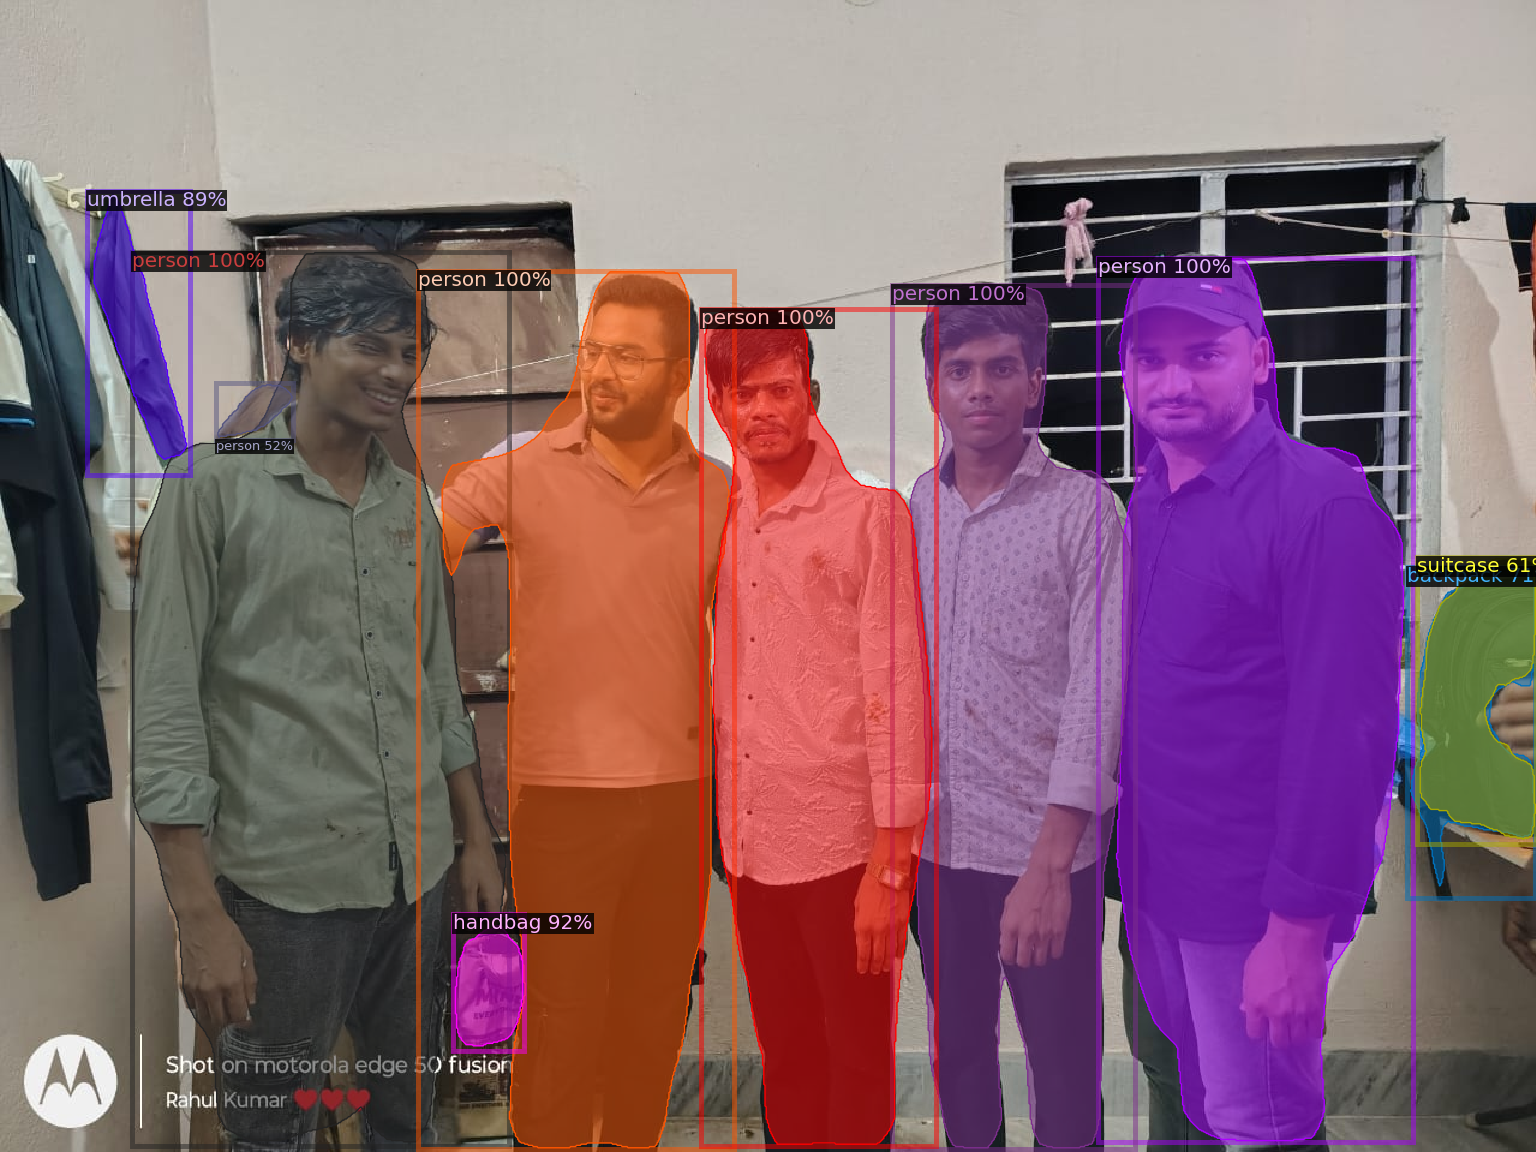

In [22]:
#visualisation

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])